#### MTT (56) plume numerical solution - 3 coupled ODES

1) Mass (volume)

    $\frac{dQ}{dz} = \frac{d}{dz}(wr^2) = 2 \alpha  w r = 2 \alpha M^{-1/2}$

2) Momentum

    $\frac{dM}{dz} = \frac{d}{dz}(w^2r^2) = g' r^2 = g' Q^2 M^{-1}$

3) Buoyancy

    $\frac{dF}{dz} = \frac{d}{dz} (w r^2 g') = - N^2 w r^2 = -N^2 Q$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Define global constants

In [4]:
global alpha, N, g_prime

alpha = 0.13 #entrainment coefficient
N = 0.8 #density stratification
g_prime = 0.05 #reduced gravity

Specify initial values

In [8]:
Q0 = 0.1
M0 = 0.1
F0 = 1

y = np.array((Q0, M0, F0))

Zmax = F0**0.25 * N**0.75
Zmom = F0**(-0.5) * M0**0.75
Z_int =5*Zmax


Runge-Kutta 4th order and MTTodes

In [11]:
def rk4(fxy, x0, xf, y0, N):
    
    # The inputs to the function are:
    #         fxy = the name of the function containing f(x,y) (e.g. MTTodes)
    #         xo,xf = initial and final values of the independent variable (integers or floats)
    #         yo = initial value of dependent variable at xo (numpy array)
    #         N = number of intervals to use between xo and xf (integer)

    # The outputs to the function are:
    #         X = numpy array containing values of the independent variable
    #         Y = the estimated dependent variable at each value of the independent variable
    #         --> this variable is a 1D numpy array if only one equation is solved
    #         --> it is an M-D numpy array [y1(x) y2(x) ... ] for multiple (M) equations 

    #compute step size and size of output variables
    if N < 2:
        N = 2 #set minimum number for N
    h = (xf - x0) / N
    X = np.zeros((N+1, 1))
    M = np.max(np.shape(y0))
    Y = np.zeros((N+1, M))*1j #make complex by multiplying by 1j; this way can add complex values to this during integration

    #set initial conditions
    x = x0
    X[0] = x
    y = [complex(val) for val in y0]  #make complex
    Y[0,:] = y
    
    #begin computational loop
    for ii in range(N):
        
        k1 = np.array([h * val for val in fxy(x,y)]) #evaluate function fxy; depending on equation, k1-4 can be complex; this is why we make Y and y complex as well
        k2 = np.array([h * val for val in fxy(x+h/2, y+k1/2)])
        k3 = np.array([h * val for val in fxy(x+h/2, y+k2/2)])
        k4 = np.array([h * val for val in fxy(x+h, y+k3)])
        
        y += (k1 + 2*k2 + 2*k3 + k4) / 6.
        x += h
        X[ii+1] = x
        Y[ii+1,:] = y
    
    return X, Y

    
def MTTodes(t,y):
    
    # input:
    #     t: float
    #     y: numpy array with length = number of equations being solved (here = 3)

    # output:
    #     ydot: numpy array of same size as y
    #            made of complex values because np.power(negative, fraction) returns nan, but np.power(negative, fraction, dtype = np.complex128) returns a complex value

    #input y is (Q0,M0,F0)

    global alpha, N, g_prime #we are bringing in constants defined in the main program.
    Q = 2 * alpha * np.power(y[1],(-1/2), dtype = np.complex128)
    M = g_prime * np.power(y[0],2, dtype=np.complex128) * np.power(y[0], -1, dtype=np.complex128)
    F = - N**2 * y[0]

    ydot = np.array((Q, M, F))
    return ydot



Call it, see if it all works...

In [12]:
[tt,yy] = rk4(fxy = MTTodes,
           x0 =  0,
           xf = Z_int,
           y0 = y,
           N = 1000)

Plot

/Users/cara/opt/miniconda3/envs/cara/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/cara/opt/miniconda3/envs/cara/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/cara/opt/miniconda3/envs/cara/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


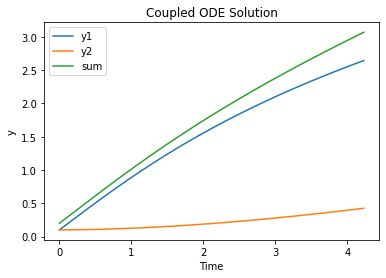

In [13]:
plt.plot(tt,yy[:,0], label = 'y1')
plt.plot(tt,yy[:,1], label = 'y2')
plt.plot(tt, yy[:,0] + yy[:,1], label = 'sum')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Coupled ODE Solution')
plt.legend()

plt.show()